In [1]:
import tensorflow as tf

2023-06-08 15:11:42.307649: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
#laod in the data 
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train shape:", x_train.shape)

x_train shape: (60000, 28, 28)


In [3]:
#create model 
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation= 'softmax')
])

In [4]:
#compile 
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
#train model
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 25s 11ms/step - loss: 0.2984 - accuracy: 0.9132 - val_loss: 0.1490 - val_accuracy: 0.9543
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1455 - accuracy: 0.9571 - val_loss: 0.1030 - val_accuracy: 0.9689
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1082 - accuracy: 0.9671 - val_loss: 0.0864 - val_accuracy: 0.9733
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0878 - accuracy: 0.9732 - val_loss: 0.0790 - val_accuracy: 0.9743
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0749 - accuracy: 0.9769 - val_loss: 0.0751 - val_accuracy: 0.9766
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0644 - accuracy: 0.9796 - val_loss: 0.0759 - val_accuracy: 0.9769
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0585 - accuracy: 0.9811 - val_loss: 0.0708 - val_a

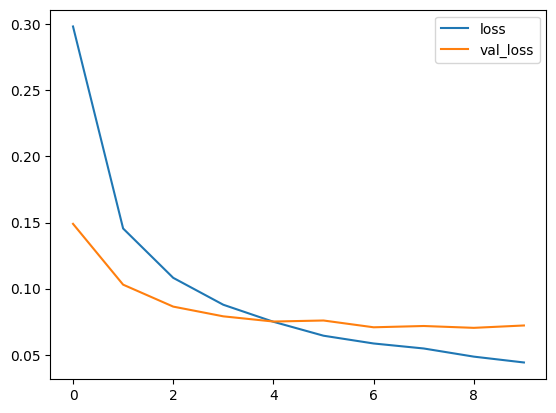

In [7]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend();

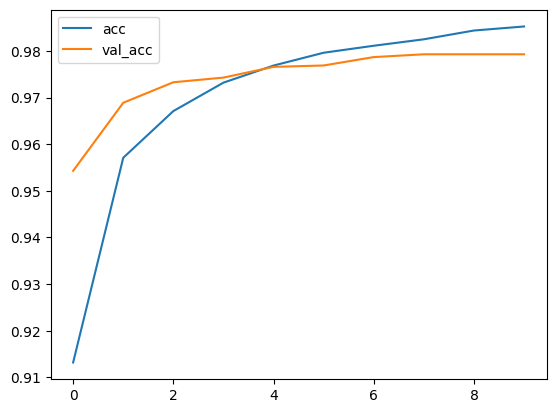

In [8]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend();

In [9]:
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 2s 5ms/step - loss: 0.0721 - accuracy: 0.9793
[0.07212481647729874, 0.9793000221252441]


313/313 [==============================] - 1s 2ms/step
Confusion matrix without normalization
[[ 973    0    1    0    0    0    2    1    3    0]
 [   0 1123    3    2    0    1    2    0    4    0]
 [   5    1 1009    1    1    0    2    5    8    0]
 [   1    0    2  988    0    6    0    4    3    6]
 [   1    0    1    1  959    0    5    1    2   12]
 [   3    0    0    6    1  874    4    1    2    1]
 [   6    3    0    1    4    6  938    0    0    0]
 [   3    6    8    5    0    0    0  997    2    7]
 [   7    0    2    1    4    3    1    3  949    4]
 [   1    2    0    4   10    4    0    3    2  983]]


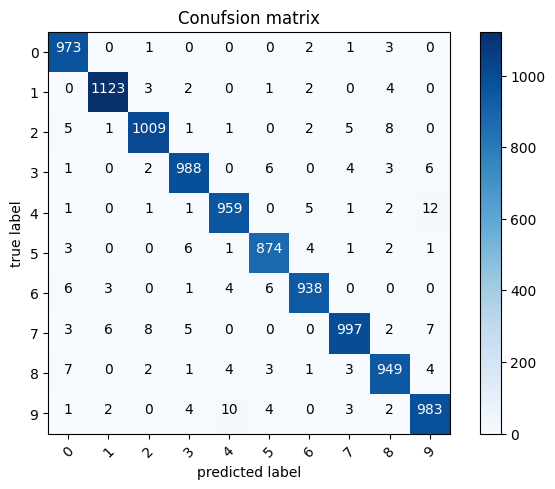

In [10]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, noramlize=False, title='Conufsion matrix', cmap=plt.cm.Blues):
    if noramlize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix without normalization')
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if noramlize else 'd'
    thresh = cm.max() / 2. 
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), 
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel("true label")
    plt.xlabel("predicted label")
    plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

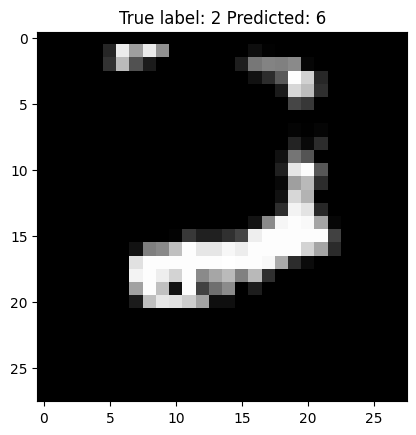

In [11]:
#show the misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap = 'gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));